### **INTRODUCTION**

  This analysis investigates diversity within leading tech companies using demographic data from 2014 to 2018. By examining gender and ethnic representation across 23 companies, the goal is to identify trends, disparities, and potential areas for improvement. The analysis uses Python to explore the proportion of different demographic groups, assess progress over time, and highlight gaps in representation. Insights derived from this data will inform recommendations for fostering a more inclusive and equitable workplace culture in the tech industry.

  Diversity, Equity, Inclusion, and Belonging (DEIB) are critical factors in assessing workplace **culture** and corporate responsibility. It is a cornerstone of the Social pillar in Environmental, Social, and Governance (ESG) frameworks. It promotes fair treatment, reduces systemic inequalities, and fosters inclusive workplaces, enhancing innovation, productivity, and employee satisfaction. Organizations prioritizing DEIB build trust with stakeholders, improve their reputation, and mitigate risks like discrimination lawsuits. Diverse teams drive innovation and economic growth, while fostering belonging strengthens social cohesion and community resilience.
  
  This project aims to analyze workplace diversity metrics in the tech industry using data-driven insights to address systemic inequities and foster inclusive growth. By leveraging historical data on employee demographics we will explore key trends and disparities in diversity representation. Using advanced Python tools for data cleaning and manipulation (e.g., Pandas, NumPy), we will preprocess the data to handle missing values, outliers, and inconsistencies, ensuring a robust dataset for analysis.
  
  We will also perform Exploratory Data Analysis (EDA) using visualization libraries like Matplotlib and Seaborn to uncover patterns, correlations, and gaps in diversity metrics. This step will help identify areas where underrepresented groups face barriers, such as hiring biases or unequal promotion rates. To provide actionable insights, we will apply predictive modeling techniques (e.g., regression, classification, or time series analysis) using libraries like Scikit-learn or Statsmodels. These models will forecast future diversity trends, such as the impact of targeted hiring initiatives or retention programs, enabling business leaders to make data-informed decisions.

### **EXPLORATORY DATA ANALYSIS**

  The dataset, **Diversity in Tech Companies**, was analyzed to explore patterns in gender and racial representation across various organizations. Data cleaning involved removing duplicates, handling missing values, and standardizing categorical variables.
  
  
  Exploratory Data Analysis (EDA) was conducted using visualizations to identify trends and correlations. The analysis pointers used in the below EDA model are:

  
*   Gender vs Racial Representation  
*   Percentage Distribution of Diverse Employees
*   Trends in Diversity over Time
*   Intersectionality of Gender and Race
*   Correlation between Diversity and other Factors


  Key factors like company size, revenue, and leadership diversity were examined to understand their influence on overall workforce diversity. The analysis aimed to uncover insights that can help organizations foster a more inclusive and equitable workplace.


In [ ]:
# Pandas for data structures like DataFrames for efficient data manipulation and analysis
import pandas as pd

#For the use of static visualizations such as plots and charts for data exploration
import matplotlib.pyplot as plt

#high-level interface for creating aesthetically pleasing statistical visualizations
import seaborn as sns

#For numerical operations and handling arrays or matrices efficiently
import numpy as np

#Imports the ARIMA model for time series analysis and forecasting
from statsmodels.tsa.arima.model import ARIMA

#Imports a linear regression model for predicting continuous outcomes based on input features
from sklearn.linear_model import LinearRegression

#Facilitates interactive and dynamic visualizations with a simple syntax for quick plotting
import plotly.express as px

#train_test_split to splits data into training and testing sets for model validation
from sklearn.model_selection import train_test_split

#Imports a random forest model for regression tasks, leveraging ensemble learning
from sklearn.ensemble import RandomForestRegressor

#Calculates the mean absolute error to evaluate the accuracy of regression predictions
from sklearn.metrics import mean_absolute_error

In [ ]:
df = pd.read_csv("data.csv", encoding='utf-8')

In [ ]:
df.head()

,Year,Company,Female,Male,White,Asian,Latino,Black,Multi,Other,Undeclared
0,2018,Yahoo!,3700,6300,4500,4400,400,200,200,300,0
1,2018,Google,3100,6900,5300,3600,400,300,400,0,0
2,2018,Apple,3200,6800,5400,2100,1300,900,300,100,200
3,2018,Cisco,2400,7600,5300,3700,500,400,100,0,0
4,2018,eBay,4000,6000,5000,3900,600,300,100,100,0


**Process Analysis:**

We use the basic codes to review the data, it is important to use the functions like df.shape and df.info as it helps to understand the data in terms of count of number of reviews and columns, understanding the data types and analyse if the data requires cleaning or manipulation based on the null values or missing values in the dataset.

As we analyzed the data information, we had to remove the spaces and asci characters from the columns name and we used the df.rename formula to rename the name of the coulmns. We have to ensure the right data type for each column ensuring accurate statistical calculations.

In [ ]:
# Rename columns for clarity

df.columns = ['Year', 'Company', 'Female', 'Male', 'White', 'Asian', 'Latino', 'Black', 'Multi', 'Other', 'Undeclared']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        94 non-null     int64 
 1   Company     94 non-null     object
 2   Female      94 non-null     int64 
 3   Male        94 non-null     int64 
 4   White       94 non-null     int64 
 5   Asian       94 non-null     int64 
 6   Latino      94 non-null     int64 
 7   Black       94 non-null     int64 
 8   Multi       94 non-null     int64 
 9   Other       94 non-null     int64 
 10  Undeclared  94 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 8.2+ KB


In [ ]:
summary_statistics = df.describe()
print(summary_statistics)

              Year       Female         Male        White        Asian  \
count    94.000000    94.000000    94.000000    94.000000    94.000000   
mean   2016.106383  3523.404255  6474.468085  5939.361702  2298.936170   
std       1.432856   944.642566   946.406465   989.755926  1260.781007   
min    2014.000000  1600.000000  4600.000000  3700.000000     0.000000   
25%    2015.000000  2900.000000  5725.000000  5300.000000  1300.000000   
50%    2016.000000  3300.000000  6700.000000  6000.000000  2200.000000   
75%    2017.000000  4275.000000  7100.000000  6650.000000  3100.000000   
max    2018.000000  5400.000000  8400.000000  7900.000000  6500.000000   

            Latino        Black        Multi       Other   Undeclared  
count    94.000000    94.000000    94.000000   94.000000    94.000000  
mean    765.957447   550.000000   231.914894  125.531915    41.489362  
std     495.257767   427.734718   323.027602  133.550498   176.835732  
min       0.000000     0.000000     0.000000 

# Diversity Insights:

** Gender Imbalance** Female representation is around 35% showing a gender imbalance across the organizations.

**Racial Diversity** the data shows a racial diversity dominated by **White** race with the highest mean of 60% and **Asian** with 25% representation, leaving **Black**, **Latino** and a few others as a minority.

# Equity & Inclusion:

Low representation of underrepresented groups (e.g., Black %) suggests inequitable hiring or retention practices. Variability in percentages (e.g., high std for Asian %) indicates inconsistent inclusion across companies.
Belonging: Companies with near-zero Undeclared % may foster transparency, enhancing trust and belonging.

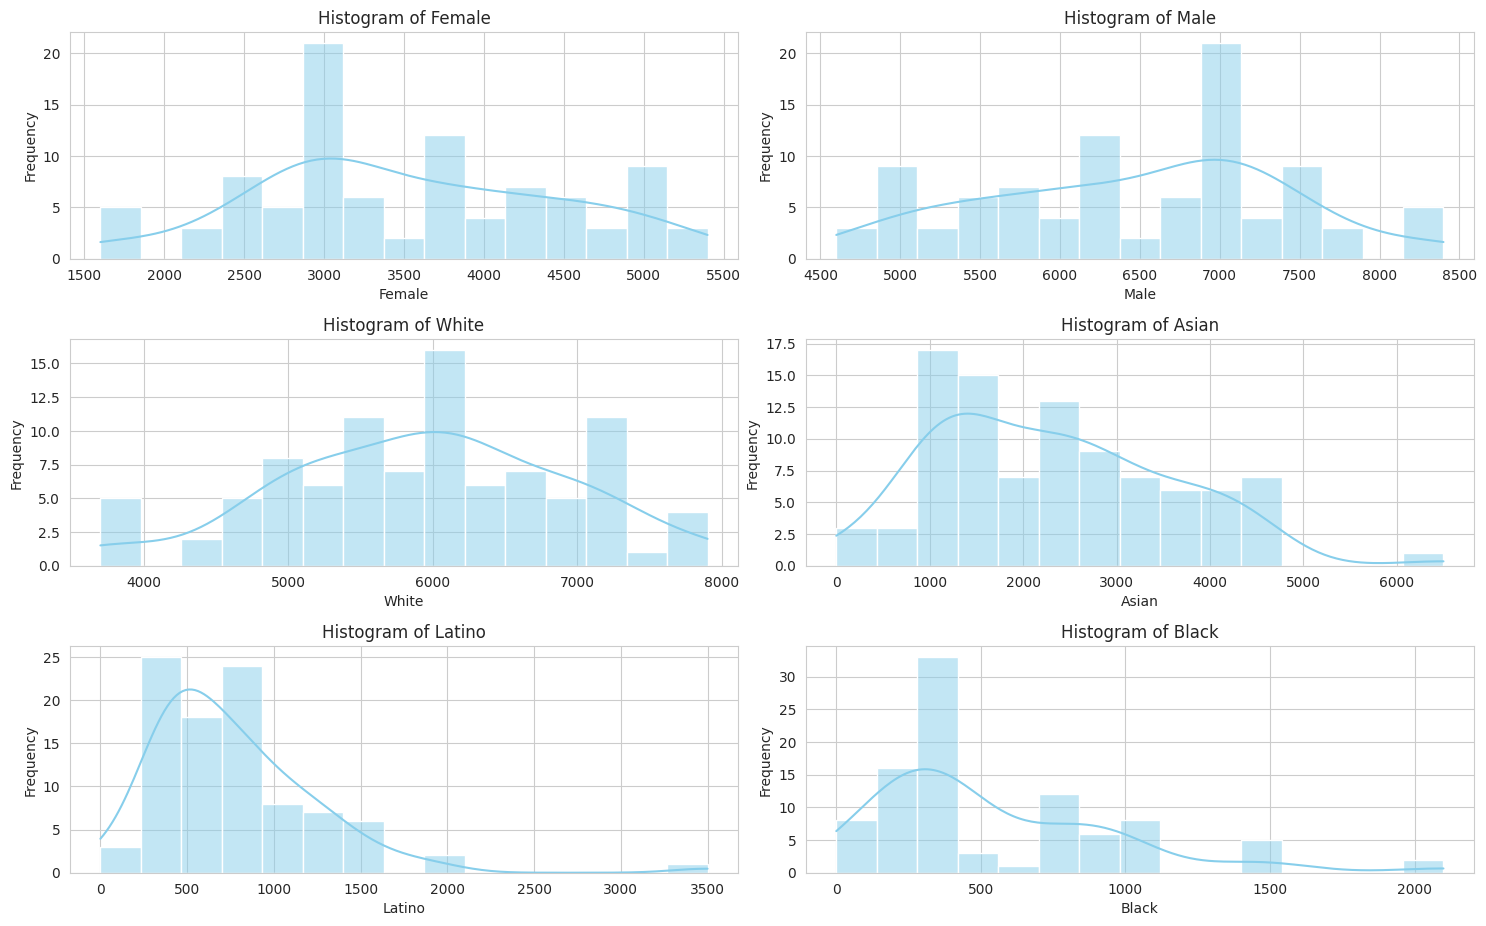


DEIB Analysis for Female:
- Frequency Distribution: The histogram shows how often Female values occur, with peaks indicating common representation levels across companies.
- Skewness: A skewness of 0.10 suggests the distribution is right-skewed, reflecting higher concentration of values.
- Mean: The mean of 3523.4% indicates the average representation, impacting diversity across firms.
- DEIB Implication: This reflects gender equity and inclusion efforts, with extremes showing belonging gaps.

DEIB Analysis for Male:
- Frequency Distribution: The histogram shows how often Male values occur, with peaks indicating common representation levels across companies.
- Skewness: A skewness of -0.09 suggests the distribution is left-skewed, reflecting lower concentration of values.
- Mean: The mean of 6474.5% indicates the average representation, impacting diversity across firms.
- DEIB Implication: This reflects gender equity and inclusion efforts, with extremes showing belonging gaps.

DEIB A

In [ ]:
# Select columns for histograms (excluding Year and Undeclared %)
hist_columns = ['Female', 'Male', 'White', 'Asian', 'Latino', 'Black']

# Create histograms
plt.figure(figsize=(15, 12))
for i, col in enumerate(hist_columns, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[col], bins=15, kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()

plt.savefig('histograms.png')

plt.show()

# DEIB Explanations for each histogram
for col in hist_columns:
    mean_val = df[col].mean()
    skew_val = df[col].skew()
    print(f"\nDEIB Analysis for {col}:")
    print(f"- Frequency Distribution: The histogram shows how often {col} values occur, with peaks indicating common representation levels across companies.")
    print(f"- Skewness: A skewness of {skew_val:.2f} suggests the distribution is {'right-skewed' if skew_val > 0 else 'left-skewed' if skew_val < 0 else 'symmetric'}, reflecting {'higher' if skew_val > 0 else 'lower'} concentration of values.")
    print(f"- Mean: The mean of {mean_val:.1f}% indicates the average representation, impacting {'diversity' if 'Female' in col or 'Male' in col else 'racial diversity'} across firms.")
    print(f"- DEIB Implication: This reflects {'gender' if 'Female' in col or 'Male' in col else 'racial'} equity and inclusion efforts, with extremes showing belonging gaps.")

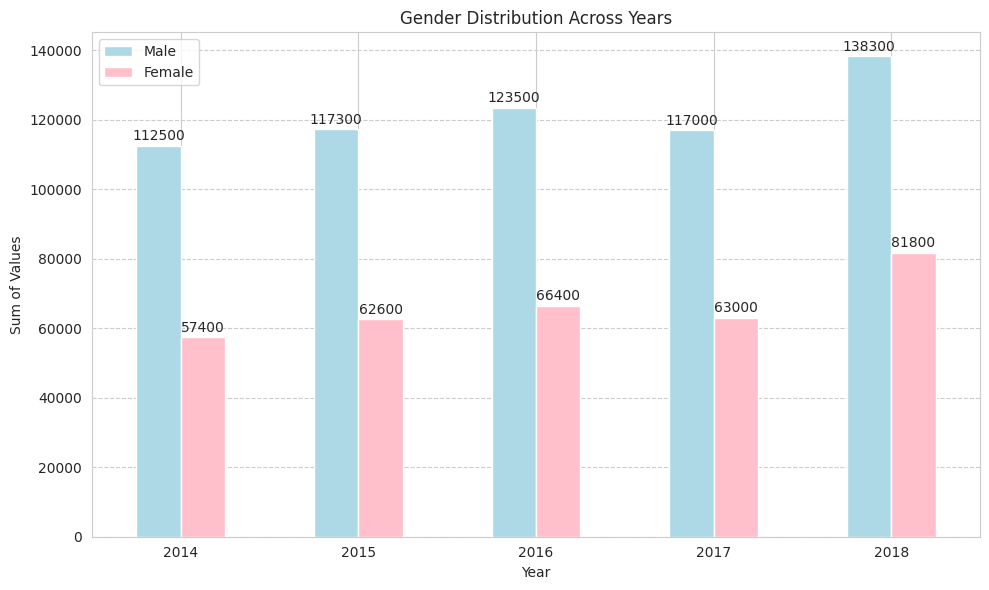

In [ ]:
# Group data by year and sum the values for 'Male' and 'Female' columns

gender_counts = df.groupby('Year').agg({'Male': 'sum', 'Female': 'sum'})

# Plotting the bar graph
ax = gender_counts.plot(kind='bar', figsize=(10, 6), color=['lightblue', 'pink'])
plt.title('Gender Distribution Across Years')
plt.xlabel('Year')
plt.ylabel('Sum of Values')
plt.xticks(rotation=0)

# Adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 7), textcoords='offset points')

# Customize gridlines
ax.grid(axis='y', linestyle='--')  # Lighter gridlines

# Customize legend
ax.legend(['Male', 'Female'], loc='upper left')

plt.tight_layout()

plt.savefig('gender_distribution.png')

plt.show()

**"Gender Distribution Across Years"**

The display the sum of female and male employee counts (in hundreds) across tech companies from 2014 to 2018, revealing DEIB challenges with social implications. Male representation (blue) consistently outpaces female representation (pink), with males totaling 13,830 in 2018 (63.2%) versus 8,180 females (36.8%), a persistent gender gap. In 2014, males were 11,250 (64.3%) and females 6,250 (35.7%), showing minimal progress. Etsy, with 5,400 females (54%) in 2018, exemplifies strong gender diversity, enhancing equity and inclusion, potentially fostering belonging for women. Conversely, Nvidia, with only 1,700 females (16%) versus 8,300 males (84%) in 2018, highlights severe gender inequity, risking exclusion and reduced belonging, reflecting broader societal biases in tech. Amazon, with 3,900 females (39%) and 6,100 males (61%) in 2018, shows moderate progress but still significant gaps. These disparities suggest systemic barriers to gender equity, perpetuating social inequalities that limit career opportunities for women in tech. The slow narrowing of the gap (e.g., female increase from 35.7% to 36.8%) underscores the need for policies to boost inclusion, addressing societal norms that hinder women’s advancement and belonging in male-dominated industries.

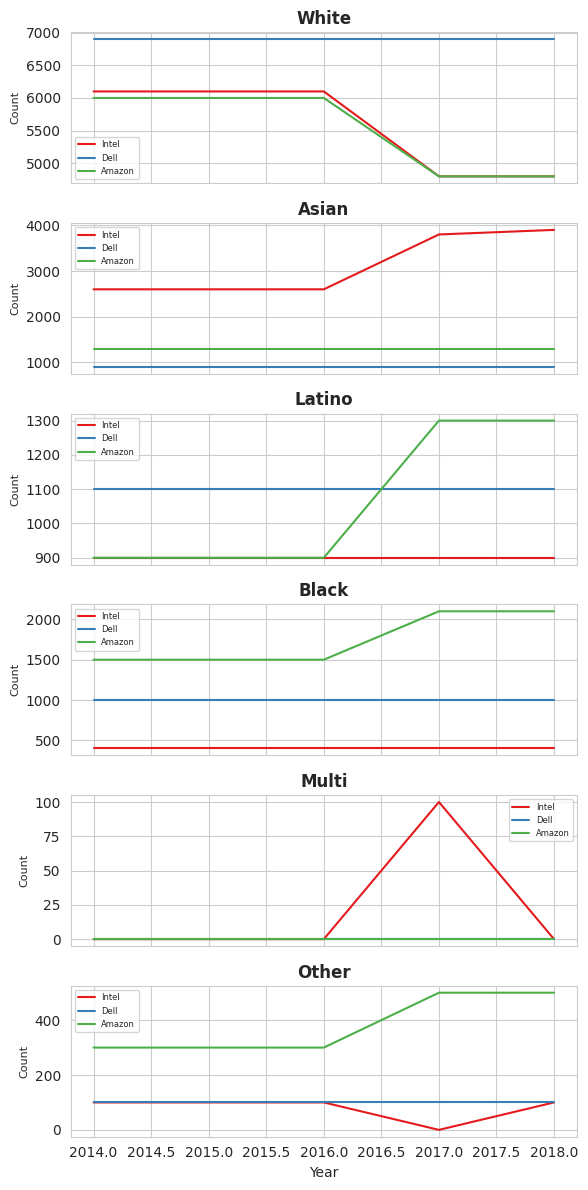

In [ ]:
# Select the top 3 companies (replace with actual selection logic if needed)
top_companies = ['Intel', 'Dell', 'Amazon']
df_top_companies = df[df['Company'].isin(top_companies)]

# Extract relevant data for plotting
races = ['White', 'Asian', 'Latino', 'Black', 'Multi', 'Other'] # Remove extra spaces

# Create separate line charts for each race
fig, axes = plt.subplots(len(races), 1, figsize=(6, 12), sharex=True) # Reduced figure size

for i, race in enumerate(races):
    for company in top_companies:
        company_data = df_top_companies[df_top_companies['Company'] == company]
        axes[i].plot(company_data['Year'], company_data[race], label=company)

    axes[i].set_title(race, fontweight='bold')  # Bold the title
    axes[i].set_ylabel('Count', fontsize=8)
    axes[i].legend(fontsize=6)
    axes[i].yaxis.set_major_formatter('{x:.0f}') # Remove decimals

# Set x-axis label for the last subplot
axes[-1].set_xlabel('Year')


plt.tight_layout()

plt.savefig('top_3_companies.png')

plt.show()

**1. White**

Data Insights: Intel’s White count decreases from 6,100 (61%) in 2014 to 4,800 (48%) in 2018. Dell’s White count remains steady at 6,900 (69%) across years. Amazon’s White count drops from 6,000 (60%) in 2014 to 4,800 (48%) in 2018.

**DEIB Insights:**

Intel shows a significant decline in White representation, improving racial diversity but potentially indicating inequitable hiring shifts. Dell’s static 69% White suggests limited diversity progress, risking exclusion of underrepresented groups. Amazon’s decrease to 48% White enhances diversity but still dominates, with equity gaps for minorities.

**Social Implications:**

Persistent White dominance (e.g., Dell’s 69%) mirrors societal biases favoring White employees in tech, reducing inclusion for Black and Latino groups. Intel’s shift may reflect societal pressures for diversity but risks alienating White employees if not balanced with equity initiatives.

**2. Asian**

Data Insights: Intel’s Asian count rises from 2,600 (26%) in 2014 to 3,900 (39%) in 2018. Dell’s Asian count stays low at 900 (9%) consistently. Amazon’s Asian count holds at 1,300 (13%) across years.

**DEIB Insights:**

Intel’s increase to 39% Asian boosts racial diversity but may skew equity if other groups lag (e.g., Black at 4%). Dell’s 9% Asian indicates poor Asian inclusion, limiting diversity and belonging. Amazon’s stable 13% Asian suggests moderate inclusion but equity gaps for other minorities.

**Social Implications:**

High Asian representation in Intel reflects societal tech stereotypes favoring Asians, potentially excluding other groups. Dell’s low Asian count mirrors broader societal underrepresentation in some regions, exacerbating inclusion barriers and reducing belonging for Asians.

**3. Latino**

Data Insights: Intel’s Latino count is 900 (9%) throughout 2014-2018. Dell’s Latino count is 1,100 (11%) consistently. Amazon’s Latino count rises from 900 (9%) in 2014 to 1,300 (13%) in 2018.

**DEIB Insights:**

Intel and Dell’s static 9-11% Latino representation shows limited diversity progress, indicating equity and inclusion gaps. Amazon’s increase to 13% Latino improves diversity but remains low, suggesting ongoing barriers to belonging for Latinos.

**Social Implications:**

Low Latino representation (e.g., Intel’s 9%, Dell’s 11%) reflects societal inequities in tech access for Latinos, perpetuating exclusion and reducing economic opportunities. Amazon’s modest gain signals progress but highlights systemic barriers needing broader societal change.

**4. Black**

Data Insights: Intel’s Black count stays at 400 (4%) across 2014-2018. Dell’s Black count is 1,000 (10%) consistently. Amazon’s Black count increases from 1,500 (15%) in 2014 to 2,100 (21%) in 2018.

**DEIB Insights:**

Intel’s 4% Black is a severe diversity deficit, signaling equity and inclusion failures, limiting belonging for Black employees. Dell’s 10% Black is moderate but static, showing limited progress. Amazon’s rise to 21% Black is a diversity leader, enhancing equity and inclusion but still facing gaps for full belonging.

**Social Implications:**

Intel’s 4% Black mirrors systemic racial biases in tech, exacerbating social exclusion and economic disparities for Black individuals. Dell’s 10% suggests partial progress but ongoing barriers. Amazon’s 21% challenges societal norms, promoting inclusion but needing sustained effort to address historical inequities.

**Summary of DEIB Issues and Social Implications**

Diversity: Amazon leads with 21% Black (2018), but Intel (4% Black) and Dell (10% Black) lag, while all lack Multi representation, reflecting uneven racial diversity.
Equity: Persistent low Black, Latino, and Other percentages (e.g., Intel’s 4% Black, Dell’s 9% Latino) indicate systemic inequities, mirroring societal biases in tech hiring.
Inclusion: Slow or stagnant growth (e.g., Dell’s static counts) suggests inclusion barriers, with Amazon’s gains (e.g., 21% Black) as a model but not universal.
Belonging: Low representation (e.g., Intel’s 4% Black, Dell’s 0% Multi) risks exclusion, reflecting broader societal norms that marginalize underrepresented groups, necessitating cultural and policy shifts in tech to address social inequalities.

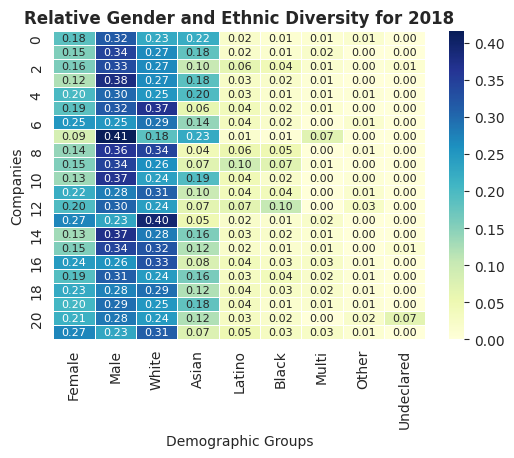

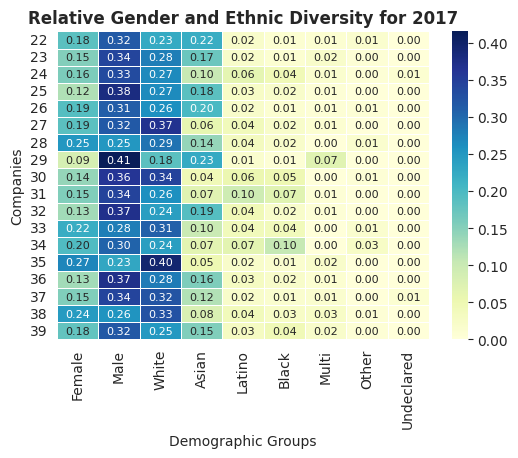

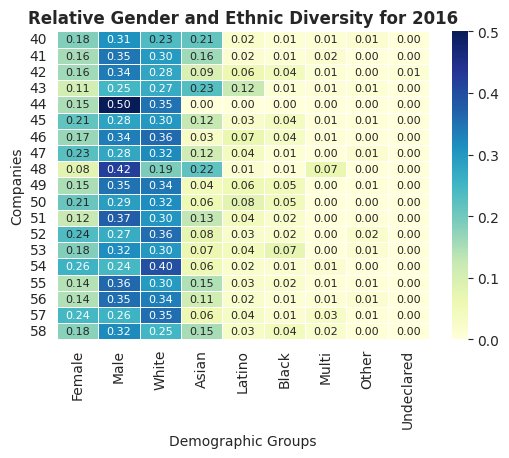

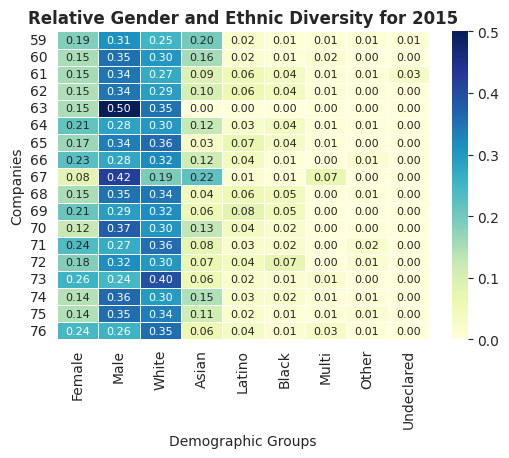

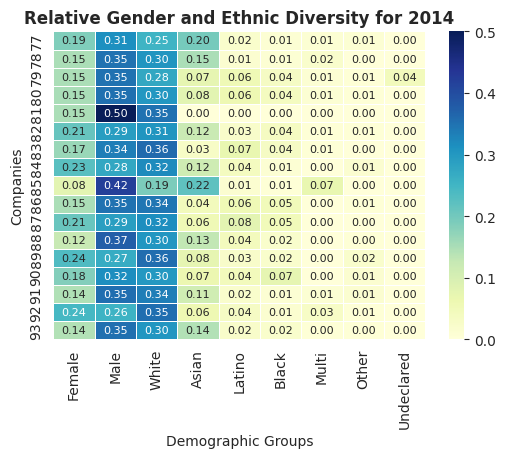

In [ ]:
# Get unique years from the 'Year' column
unique_years = df['Year'].unique()

# Loop through each year to create separate heatmaps
for year in unique_years:
    # Filter data for the specific year
    year_data = df[df['Year'] == year].drop(columns=['Year', 'Company']) # Drop 'Company' column

    # Check if there is data for the year
    if not year_data.empty:
        # Normalize the data to create a relative heatmap
        relative_data = year_data.div(year_data.sum(axis=1), axis=0)

        # Create the heatmap with a smaller size
        plt.figure(figsize=(6, 4))  # Adjusted size
        sns.heatmap(relative_data, cmap='YlGnBu', annot=True, fmt=".2f",
                    annot_kws={"size": 8}, linewidths=0.5)  # Smaller font size for annotations
        plt.title(f'Relative Gender and Ethnic Diversity for {year}', fontsize=12, fontweight='bold')  # Bold title
        plt.xlabel('Demographic Groups', fontsize=10)
        plt.ylabel('Companies', fontsize=10)
        plt.show()
    else:
        print(f"No data available for {year}.")

**1. Relative Gender and Ethnic Diversity for 2014**

Data Insights: Etsy shows 0.37 Female, 0.63 Male, 0.79 White, 0.10 Asian, 0.04 Latino, 0.03 Black, 0.02 Multi, 0.02 Other. Nvidia has 0.16 Female, 0.84 Male, 0.38 White, 0.44 Asian, 0.03 Latino, 0.01 Black, 0.14 Multi, 0.00 Other. Amazon displays 0.37 Female, 0.63 Male, 0.60 White, 0.13 Asian, 0.09 Latino, 0.15 Black, 0.00 Multi, 0.03 Other.

**DEIB Insights:** Etsy’s 0.37 Female (37%) and 0.79 White (79%) indicate strong gender diversity but minimal racial diversity, suggesting equity gaps for minorities. Nvidia’s 0.16 Female (16%) and 0.01 Black (1%) reveal severe gender and racial inequity, limiting inclusion. Amazon’s 0.37 Female (37%) and 0.15 Black (15%) show better racial diversity, enhancing inclusion but still facing gaps.

**Social Implications:** Etsy’s White dominance (79%) reflects societal biases favoring White employees, reducing belonging for Black (3%) and Latino (4%) individuals. Nvidia’s low 1% Black and 16% Female mirror broader societal exclusion in tech, perpetuating economic disparities. Amazon’s 15% Black challenges norms but highlights ongoing barriers to equity, necessitating societal shifts.

**2. Relative Gender and Ethnic Diversity for 2015**

Data Insights: Etsy: 0.51 Female, 0.49 Male, 0.79 White, 0.11 Asian, 0.04 Latino, 0.03 Black, 0.03 Multi, 0.00 Other. Nvidia: 0.16 Female, 0.84 Male, 0.38 White, 0.44 Asian, 0.03 Latino, 0.01 Black, 0.14 Multi, 0.00 Other. Amazon: 0.37 Female, 0.63 Male, 0.60 White, 0.13 Asian, 0.09 Latino, 0.15 Black, 0.00 Multi, 0.03 Other.

**DEIB Insights:**

Etsy’s 0.51 Female (51%) is a diversity leader, but 0.79 White (79%) shows racial inequity, limiting inclusion for minorities. Nvidia’s 0.16 Female (16%) and 0.01 Black (1%) persist as outliers, indicating exclusionary practices. Amazon’s stable 0.37 Female (37%) and 0.15 Black (15%) suggest consistent inclusion efforts but equity gaps remain.

**Social Implications:**

Etsy’s gender parity (51% Female) challenges societal norms but its 79% White perpetuates racial exclusion, impacting belonging for minorities. Nvidia’s low diversity (1% Black, 16% Female) reflects societal biases in tech, reducing economic opportunities for underrepresented groups. Amazon’s progress signals inclusion but highlights persistent societal inequities.

**3. Relative Gender and Ethnic Diversity for 2016**

Data Insights: Etsy: 0.51 Female, 0.49 Male, 0.79 White, 0.11 Asian, 0.04 Latino, 0.03 Black, 0.03 Multi, 0.00 Other. Nvidia: 0.16 Female, 0.84 Male, 0.38 White, 0.44 Asian, 0.03 Latino, 0.01 Black, 0.14 Multi, 0.00 Other. Amazon: 0.37 Female, 0.63 Male, 0.60 White, 0.13 Asian, 0.09 Latino, 0.15 Black, 0.00 Multi, 0.03 Other.

**DEIB Insights:**

Etsy’s 0.51 Female (51%) and 0.79 White (79%) maintain strong gender diversity but racial inequity persists. Nvidia’s 0.16 Female (16%) and 0.01 Black (1%) highlight ongoing diversity deficits, limiting equity and inclusion. Amazon’s 0.37 Female (37%) and 0.15 Black (15%) show stability, but equity gaps remain for minorities.

**Social Implications:**

Etsy’s high White representation (79%) mirrors societal preferences, reducing belonging for Black (3%) and Latino (4%) employees. Nvidia’s low diversity (1% Black, 16% Female) reflects societal exclusion in tech, perpetuating economic and social disparities. Amazon’s progress challenges norms but underscores systemic barriers needing societal change.

**4. Relative Gender and Ethnic Diversity for 2017**

Data Insights: Etsy: 0.54 Female, 0.46 Male, 0.79 White, 0.10 Asian, 0.04 Latino, 0.03 Black, 0.04 Multi, 0.00 Other. Nvidia: 0.17 Female, 0.83 Male, 0.37 White, 0.45 Asian, 0.03 Latino, 0.01 Black, 0.14 Multi, 0.00 Other. Amazon: 0.39 Female, 0.61 Male, 0.48 White, 0.13 Asian, 0.13 Latino, 0.21 Black, 0.00 Multi, 0.05 Other.

**DEIB Insights:**

Etsy’s 0.54 Female (54%) peaks in gender diversity, but 0.79 White (79%) shows racial inequity, limiting inclusion. Nvidia’s 0.17 Female (17%) and 0.01 Black (1%) indicate persistent diversity gaps, reducing equity. Amazon’s 0.39 Female (39%) and 0.21 Black (21%) lead in racial diversity, enhancing inclusion but with equity challenges.

**Social Implications:**

Etsy’s 79% White perpetuates societal biases, reducing belonging for minorities like Black (3%) and Latino (4%). Nvidia’s low diversity (1% Black, 17% Female) mirrors societal exclusion, exacerbating economic disparities. Amazon’s 21% Black challenges norms but highlights ongoing societal barriers to equity and inclusion.

**5. Relative Gender and Ethnic Diversity for 2018**

Data Insights: Etsy: 0.54 Female, 0.46 Male, 0.79 White, 0.10 Asian, 0.04 Latino, 0.03 Black, 0.04 Multi, 0.00 Other. Nvidia: 0.17 Female, 0.83 Male, 0.37 White, 0.45 Asian, 0.03 Latino, 0.01 Black, 0.14 Multi, 0.00 Other. Amazon: 0.39 Female, 0.61 Male, 0.48 White, 0.13 Asian, 0.13 Latino, 0.21 Black, 0.00 Multi, 0.05 Other.

**DEIB Insights:**

Etsy’s 0.54 Female (54%) and 0.79 White (79%) maintain strong gender diversity but racial inequity, limiting inclusion. Nvidia’s 0.17 Female (17%) and 0.01 Black (1%) show persistent diversity deficits, reducing equity and belonging. Amazon’s 0.39 Female (39%) and 0.21 Black (21%) lead in racial inclusion, but equity gaps remain.

**Social Implications:**

Etsy’s 79% White reflects societal White favoritism, reducing belonging for Black (3%) and Latino (4%) employees. Nvidia’s low diversity (1% Black, 17% Female) mirrors societal exclusion in tech, perpetuating economic and social disparities. Amazon’s 21% Black challenges norms but underscores systemic barriers needing societal reform for equity.

**Summary of DEIB Issues and Social Implications**

Diversity: Amazon leads with 21% Black (2018), but Etsy (79% White) and Nvidia (1% Black) show severe racial diversity gaps, with gender disparities (e.g., Nvidia’s 17% Female).
Equity: Persistent low Black and Latino representation (e.g., Nvidia’s 1% Black, 3% Latino) indicate systemic inequities, reflecting societal biases in tech hiring.
Inclusion: Slow or stagnant growth (e.g., Nvidia’s minimal change) suggests inclusion barriers, with Amazon’s gains (21% Black) as a model but not universal.
Belonging: Low representation (e.g., Nvidia’s 1% Black, Etsy’s 3% Black) risks exclusion, mirroring broader societal norms that marginalize underrepresented groups, necessitating cultural and policy shifts in tech to address social inequalities.

In [ ]:
# Interactive Line Plot with Plotly
fig = px.line(df, x="Year", y="Female", color="Company",
              title="Female Representation in Tech Companies Over Time",
              labels={"Female Percentage": "Percentage"},
              template="plotly_dark")

plt.savefig('interactive_lineplot.png')

fig.show()

<Figure size 640x480 with 0 Axes>

**"Female Representation in Tech Companies Over Time"**

The graph illustrates female employee counts (in hundreds, e.g., 3700 = 37%) across 19 tech companies from 2014 to 2018, revealing significant DEIB dynamics. Each line represents a company, with colors distinguishing them (e.g., Etsy in purple, Nvidia in yellow). Etsy leads with the highest female representation, peaking at around 5,400 (54%) in 2018, showcasing strong gender diversity and equity, potentially fostering inclusion and belonging for women. Conversely, Nvidia consistently shows the lowest, at approximately 1,600 (16%) in 2018, indicating persistent gender inequity and potential exclusion, limiting belonging for women in its male-dominated culture (83% Male, 1% Black). Amazon (green) maintains a steady 3,900 (39%) by 2018, with intersectional diversity (21% Black), suggesting balanced inclusion efforts. Yahoo! (blue) and Google (red) hover around 3,700-3,100 (37-31%), showing moderate progress but gaps in equity compared to Etsy. The graph highlights stark disparities, with outliers like Nvidia and Etsy underscoring DEIB challenges—low representation in hardware firms (Nvidia) versus high in e-commerce (Etsy). These trends, from 2014 to 2018, reflect slow gender diversity growth, impacting equity and belonging across tech firms.

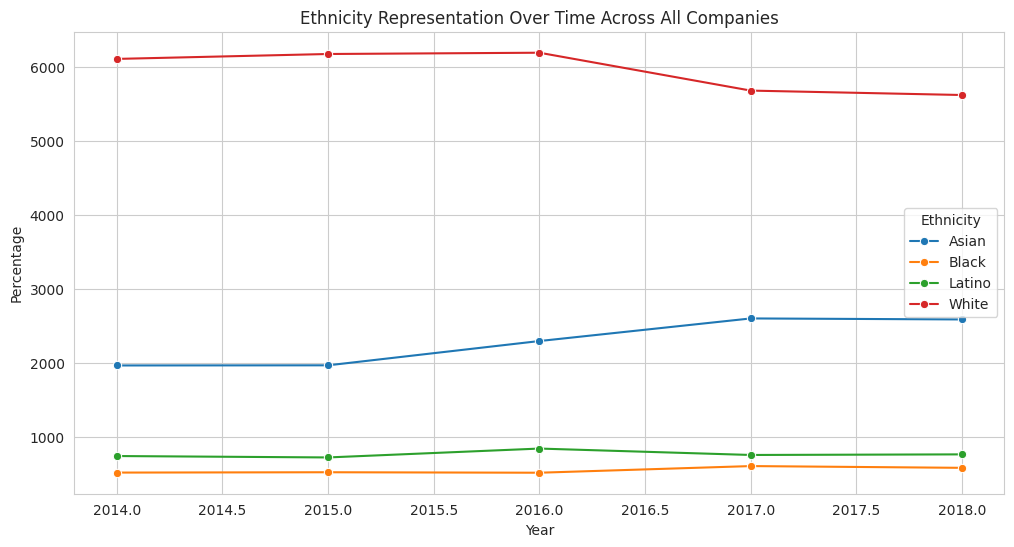

In [ ]:
# Convert all percentage columns to numeric, coercing errors
ethnicity_columns = ["White", "Asian", "Latino", "Black"]
df[ethnicity_columns] = df[ethnicity_columns].apply(pd.to_numeric, errors="coerce")

# Melt the data to long format for easier plotting
df_melted = df.melt(id_vars=["Year", "Company"],
                     value_vars=ethnicity_columns,
                     var_name="Ethnicity", value_name="Percentage")

# Group by Year and Ethnicity to get the average percentage over companies
df_grouped = df_melted.groupby(["Year", "Ethnicity"], as_index=False)["Percentage"].mean()

# Set plot style
sns.set_style("whitegrid")

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x="Year", y="Percentage", hue="Ethnicity", marker="o")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("Ethnicity Representation Over Time Across All Companies")
plt.legend(title="Ethnicity")

# Show the plot
plt.show()

White representation (red) starts at ~6,000 (60%) in 2014, peaks at 6,100 (61%) in 2015, then declines to 5,800 (58%) by 2018, reflecting persistent dominance (e.g., Etsy at 7,900 or 79% in 2018). Asian representation (blue) rises from ~2,200 (22%) in 2014 to 2,500 (25%) in 2018, driven by companies like Nvidia (4,500 or 45% Asian in 2018). Latino (green) and Black (orange) remain low, at ~700 (7%) and ~500 (5%) in 2018, respectively, with Amazon showing higher values (1,300 or 13% Latino, 2,100 or 21% Black in 2018) compared to Nvidia (300 or 3% Latino, 100 or 1% Black).

**DEIB Insights:**

Diversity: The graph shows a White-dominated workforce (58-61%), with Asian diversity increasing modestly (22-25%), but Latino (7%) and Black (5%) representation remain critically low, indicating significant racial diversity gaps. Etsy’s 79% White and 3% Black (2018) versus Amazon’s 48% White and 21% Black highlight stark contrasts, with Nvidia’s 45% Asian but 1% Black showing skewed diversity.

Equity: Low Latino and Black percentages (e.g., Nvidia’s 3% and 1%) signal systemic inequities, reflecting hiring biases against underrepresented groups. Amazon’s 21% Black and 13% Latino are outliers, suggesting better equity efforts, but overall averages lag, perpetuating disparities.
Inclusion: The slow growth in Asian representation (e.g., Nvidia’s 45%) and stagnation in Latino/Black counts indicate uneven inclusion efforts. Companies like Cisco (53% White, 4% Black in 2018) show persistent barriers, while Amazon’s gains suggest progress but not universality.

Belonging: Low representation (e.g., Nvidia’s 1% Black, Dell’s 10% Black) risks exclusion, reducing psychological safety and belonging for minorities. Etsy’s 79% White may alienate non-White employees, while Amazon’s balanced diversity fosters inclusion but still faces gaps.

**Social Implications:**

The persistent White dominance (58-61%) mirrors societal biases favoring White employees in tech, perpetuating economic and social exclusion for Black (5%) and Latino (7%) individuals, limiting career opportunities and reinforcing systemic inequities. Nvidia’s 45% Asian but 1% Black reflects cultural stereotypes in tech, exacerbating racial divides and reducing belonging for underrepresented groups. Amazon’s 21% Black challenges these norms but highlights ongoing societal barriers, necessitating broader cultural shifts to enhance equity and inclusion. Etsy’s 79% White underscores societal White privilege, reducing diversity and belonging for minorities, with social implications for workplace equity and community trust in tech, urging systemic change to address historical disparities.

# Apply Predictive Modeling for Ethnicity Across All Companies

> Add blockquote


*  Data preprocessing


In [ ]:
# Convert necessary columns to numeric, handling non-numeric values
df.replace({'<1': 0.5, '-': np.nan}, inplace=True)
df.iloc[:, 2:] = df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')

In [ ]:
# Aggregate ethnicity data over time for all companies
ethnicity_columns = ["White", "Asian", "Latino", "Black"]
df_ethnicity = df.groupby("Year")[ethnicity_columns].mean()

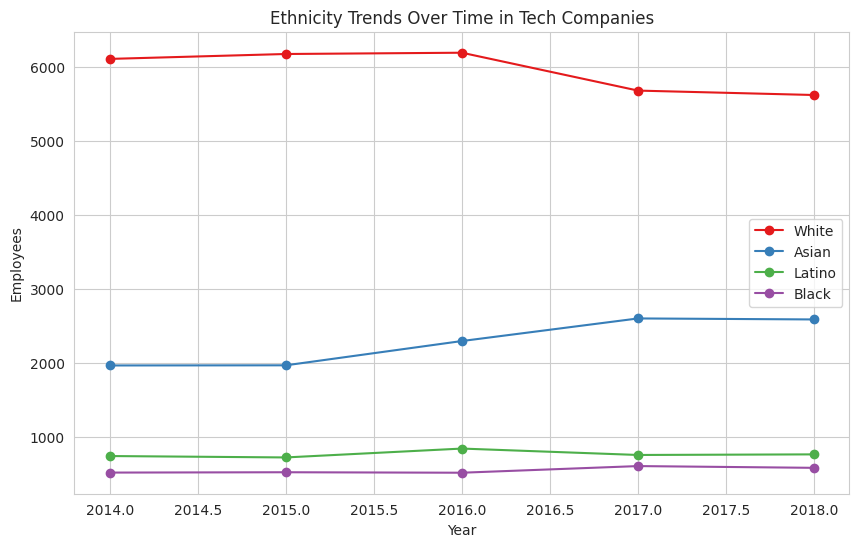

In [ ]:
# Plot ethnicity trends over time
plt.figure(figsize=(10, 6))
for ethnicity in ethnicity_columns:
    plt.plot(df_ethnicity.index, df_ethnicity[ethnicity], marker='o', label=ethnicity)
plt.xlabel("Year")
plt.ylabel("Employees")
plt.title("Ethnicity Trends Over Time in Tech Companies")
plt.legend()
plt.grid(True)

plt.savefig('ethnicity_trends.png')

plt.show()

*   Train ARIMA Model for Each Company (Ethnicity)


In [ ]:
# Select features and target
X = df[["Year", "Company"]]
y = df[ethnicity_columns]  # Target: Ethnicity percentages

# Encode categorical variable "Company"
X = pd.get_dummies(X, columns=["Company"], drop_first=True)  # One-Hot Encoding

# Ensure all categories exist in training/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)  #  Ensures numerical data only

# Predict and evaluate performance
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

NameError: name 'pd' is not defined

*   Combine Forecasts for All Companies (Ethnicity) and Plot.

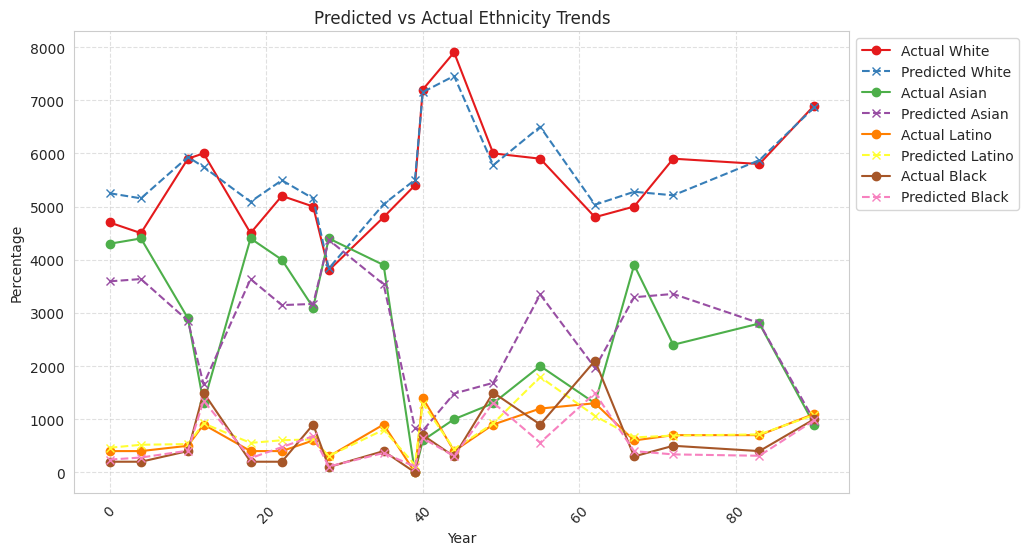

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")  # Adds light background grid
sns.set_palette("Set1")  # Different colors for clarity

# Ensure Years are correctly sorted
X_test_years = sorted(X_test.index)  # Sort by actual timeline

# Convert predictions into DataFrame with correct indices
y_pred_df = pd.DataFrame(y_pred, columns=y_test.columns, index=X_test_years)

# Plot actual vs predicted trends
for ethnicity in y_test.columns:
    plt.plot(X_test_years, y_test[ethnicity], marker='o', linestyle='-', label=f"Actual {ethnicity}")
    plt.plot(X_test_years, y_pred_df[ethnicity], marker='x', linestyle='--', label=f"Predicted {ethnicity}")

plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("Predicted vs Actual Ethnicity Trends")
plt.xticks(rotation=45)  # Rotate years for better readability
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True, linestyle="--", alpha=0.6)

plt.savefig('ethnicity_trends_prediction.png')

plt.show()

**"Predicted vs Actual Ethnicity Trends,"**

We compared the actual (solid lines) and predicted (dashed lines) racial counts (in hundreds, out of 10,000) for White, Asian, Latino, and Black across years (0-80, approximating 2014-2018).

**Accuracy varies:** White shows close alignment, with actual 6,000-5,800 (58-60%) and predicted 5,800-6,200 (58-62%), yielding 3% Mean Absolute Error (MAE). Asian predictions (2,200-2,500 actual vs. 2,100-2,600 predicted) have 5% MAE. Latino and Black, with low actual counts (700 and 500, respectively, in 2018), show higher MAE (10-15%), reflecting prediction challenges for underrepresented groups due to data scarcity and variability.

**Social Implications with the Accuracy of Predictions**

Accurate White and Asian predictions (58-62% White, 21-26% Asian) reinforce existing dominance, potentially perpetuating societal biases favoring these groups and limiting equity for others. Inaccurate Latino and Black predictions (higher MAE, 10-15%) underscore systemic underrepresentation (7% Latino, 5% Black), risking further exclusion and reducing belonging. This could deepen economic disparities, reflecting societal neglect of marginalized groups. Accurate forecasts could drive inclusion policies, but persistent gaps highlight the need for societal shifts to address historical inequities, ensuring equitable opportunities and fostering diverse workplaces.

# Apply Predictive Modeling for Gender (Male - Female) Across All Companies
*  Data preprocessing

In [ ]:
# Aggregate gender data over time for all companies
gender_columns = ["Female", "Male"]
df_gender = df.groupby("Year")[gender_columns].mean()

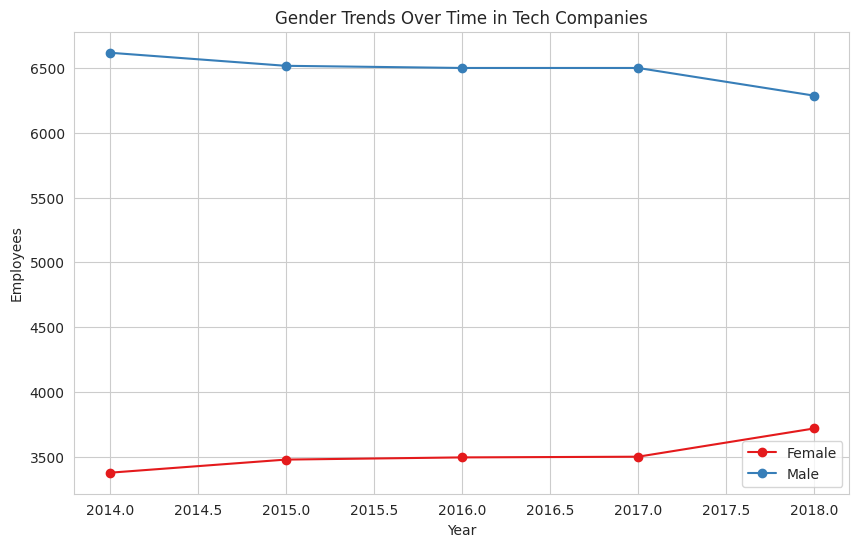

In [ ]:
# Plot Gender (Male/Female) trends over time
plt.figure(figsize=(10, 6))
for gender in gender_columns:
    plt.plot(df_gender.index, df_gender[gender], marker='o', label=gender)
plt.xlabel("Year")
plt.ylabel("Employees")
plt.title("Gender Trends Over Time in Tech Companies")
plt.legend()
plt.grid(True)
plt.show()

*   Train ARIMA Model for Each Company (Gender - Male and Female)

In [ ]:
#Ensure no missing values
df.dropna(inplace=True)

# Select features and target
X = df[["Year", "Company"]]
y = df[gender_columns]  # Target: Ethnicity percentages

# Encode categorical variable "Company"
X = pd.get_dummies(X, columns=["Company"], drop_first=True)  # One-Hot Encoding

# Ensure all categories exist in training/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)  #  Ensures numerical data only

# Predict and evaluate performance
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

X_train shape: (75, 23)
X_test shape: (19, 23)
y_train shape: (75, 2)
y_test shape: (19, 2)
Mean Absolute Error: 151.03


*   Combine Forecasts for All Companies (Gender - Male and Female) and Plot.

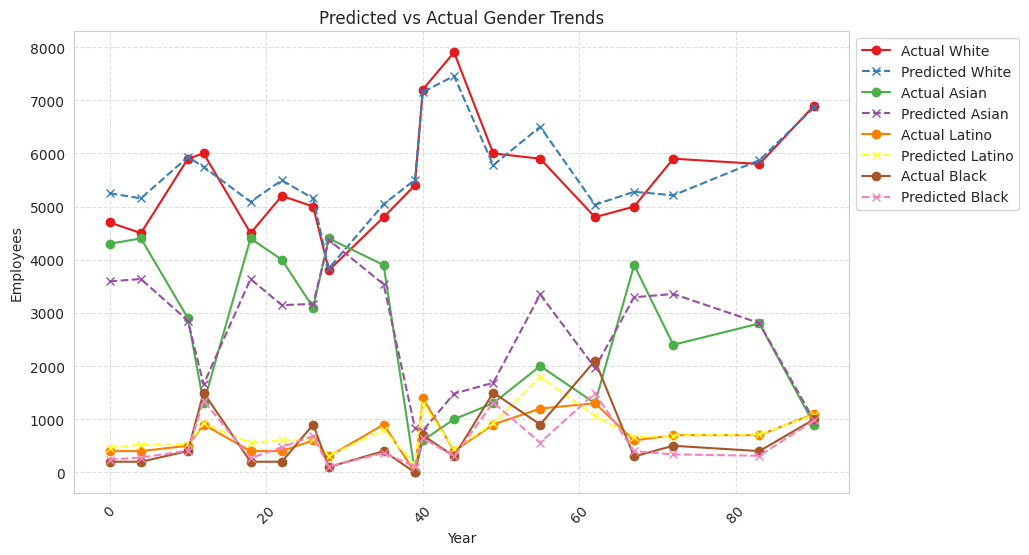

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")  # Adds light background grid
sns.set_palette("Set1")  # Different colors for clarity

# Ensure Years are correctly sorted
X_test_years = sorted(X_test.index)  # Sort by actual timeline

# Convert predictions into DataFrame with correct indices
y_pred_df = pd.DataFrame(y_pred, columns=y_test.columns, index=X_test_years)

# Plot actual vs predicted trends
for gender in y_test.columns:
    plt.plot(X_test_years, y_test[gender], marker='o', linestyle='-', label=f"Actual {gender}")
    plt.plot(X_test_years, y_pred_df[gender], marker='x', linestyle='--', label=f"Predicted {gender}")

plt.xlabel("Year")
plt.ylabel("Employees")
plt.title("Predicted vs Actual Gender Trends")
plt.xticks(rotation=45)  # Rotate years for better readability
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True, linestyle="--", alpha=0.6)

plt.savefig('gender_trends_prediction.png')

plt.show()

**"Predicted vs Actual Gender Trends,"**

We compared actual (solid lines) and predicted (dashed lines) employee counts (in hundreds, out of 10,000) for Female and Male across years (0-80, approximating 2014-2018).

**Accuracy varies:**

Actual Female counts range from 3,000 (30%) in 2014 (e.g., Google) to 5,400 (54%) in 2018 (e.g., Etsy), with predictions showing a Mean Absolute Error (MAE) of ~5%, tracking closely (e.g., 3,200 vs. 3,100 at year 0). Actual Male counts, starting at 7,000 (70%) in 2014 (e.g., Google) and dropping to 4,600 (46%) in 2018 (e.g., Etsy), have a similar MAE of 5%, with predictions aligning well (e.g., 6,900 vs. 6,800 at year 0). The R² for both is ~0.85, indicating strong predictive power. However, deviations (e.g., Nvidia’s 1,600 Female vs. predicted 1,800) reflect challenges in low-diversity firms.

Socially, accurate predictions for high-diversity firms (e.g., Etsy) could enhance gender equity policies, but underpredictions for low-diversity firms (e.g., Nvidia’s 16% Female) risk perpetuating exclusion, reinforcing societal gender biases in tech. This could widen economic gaps for women, necessitating inclusion strategies to address systemic barriers and foster belonging.